# M5 – Data Understanding

Este notebook tiene como objetivo entender la estructura y el contenido
de los archivos base del dataset M5, comenzando por el archivo de calendario.

El análisis en este punto es descriptivo y exploratorio.

### Librerías

In [2]:
import pandas as pd
import fastparquet
import matplotlib.pyplot as plt

## Dataset "calendar.csv"

In [3]:
calendar = pd.read_csv("../data/raw/calendar.csv")

In [4]:
#Dimensión
calendar.shape

(1969, 14)

In [5]:
#Primeras filas
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [6]:
#Tipos de datos
calendar.info()

<class 'pandas.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   date          1969 non-null   str  
 1   wm_yr_wk      1969 non-null   int64
 2   weekday       1969 non-null   str  
 3   wday          1969 non-null   int64
 4   month         1969 non-null   int64
 5   year          1969 non-null   int64
 6   d             1969 non-null   str  
 7   event_name_1  162 non-null    str  
 8   event_type_1  162 non-null    str  
 9   event_name_2  5 non-null      str  
 10  event_type_2  5 non-null      str  
 11  snap_CA       1969 non-null   int64
 12  snap_TX       1969 non-null   int64
 13  snap_WI       1969 non-null   int64
dtypes: int64(7), str(7)
memory usage: 263.1 KB


In [7]:
#Columnas
calendar.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='str')

### Observaciones iniciales – calendar.csv

- Cada fila representa un día del calendario.
- La columna `d` funciona como identificador temporal y permite
  relacionar este archivo con las ventas diarias.
- Se incluyen variables relacionadas con eventos especiales,
  días de la semana y promociones (SNAP: Supplemental Nutrition Assistance Program).
- SNAP = indicador de promoción/subsidio que puede afectar la demanda.
- wm_yr_wk = clave temporal semanal usada para precios
- Este archivo permitirá analizar efectos de calendario sobre las ventas.

## Dataset "sales"

In [8]:
sales = pd.read_csv("../data/raw/sales_train_validation.csv")

In [9]:
#Dimensión
sales.shape

(30490, 1919)

In [10]:
#Primeras filas
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [11]:
#Tipo de dato
sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), str(6)
memory usage: 448.2 MB


### Observaciones iniciales – sales_train_validation.csv

- Cada fila representa un producto específico vendido en una tienda específica.
- Las columnas `d_1` a `d_1913` representan ventas diarias en formato ancho.
- La granularidad mínima del dataset es item–store–day.
- Para análisis exploratorio y visualización, será necesario transformar el dataset a formato largo.


### Transformación de datos

El dataset de ventas se encuentra en formato ancho, con una columna por cada día (`d_1`, `d_2`, …).
Si bien este formato es adecuado para almacenamiento y modelado, dificulta la exploración y visualización temporal.

Para facilitar el análisis, se transformará el dataset a formato largo, donde cada fila representa una observación diaria por producto y tienda.

In [12]:
#Columnas de ventas
sales_cols = [c for c in sales.columns if c.startswith("d_")]
len(sales_cols)

1913

In [13]:
#Transformación
sales_long_all = sales.melt(
    id_vars=["id","item_id","dept_id","cat_id","store_id","state_id"],
    var_name="d",
    value_name="units_sold"
)
sales_long_all.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [14]:
#Dimension
sales_long_all.shape

(58327370, 8)

In [ ]:
#guardamos parquet
sales_long_all.to_parquet(
    "../data/curated/sales_long.parquet",
    engine="fastparquet",
    index=False
)

In [15]:
sales_long_focus = sales_long_all[
    (sales_long_all["state_id"].isin(["CA","TX"])) &
    (sales_long_all["cat_id"].isin(["FOODS","HOBBIES"]))
].copy()

### Unión con calendar.csv

In [16]:
#Seleccionamos columnas importantes de calendar
calendar_small = calendar[
    ["d", "date", "wm_yr_wk", "weekday", "event_name_1", "event_type_1", "snap_CA", "snap_TX"]
].copy()

In [17]:
#Conversión de fecha
calendar_small["date"] = pd.to_datetime(calendar_small["date"])

In [18]:
#Unión Sales - Calendar
sales_enriched = sales_long_all.merge(
    calendar_small,
    on="d",
    how="left"
)

In [19]:
sales_enriched.shape
sales_enriched.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,date,wm_yr_wk,weekday,event_name_1,event_type_1,snap_CA,snap_TX
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,NaN,NaN,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,NaN,NaN,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,NaN,NaN,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,NaN,NaN,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,NaN,NaN,0,0


### Enriquecimiento con calendario

Se unieron los datos de sales con calendar utilizando la clave temporal `d`,
con el objetivo de contar con fechas reales y variables asociadas a eventos.

Este enriquecimiento permitirá analizar patrones temporales y posibles efectos de calendario
sobre el comportamiento de ventas.

### ¿Cómo se comportan las ventas en el tiempo por estado y categoría?

In [20]:
#Agrupación de ventas por fecha, estado y categoria
daily_sales = (
    sales_enriched
    .groupby(["date", "state_id", "cat_id"], as_index=False)
    .agg(total_units=("units_sold", "sum"))
)

daily_sales.head()

,date,state_id,cat_id,total_units
0,2011-01-29,CA,FOODS,10101
1,2011-01-29,CA,HOBBIES,1802
2,2011-01-29,CA,HOUSEHOLD,2292
3,2011-01-29,TX,FOODS,6853
4,2011-01-29,TX,HOBBIES,879


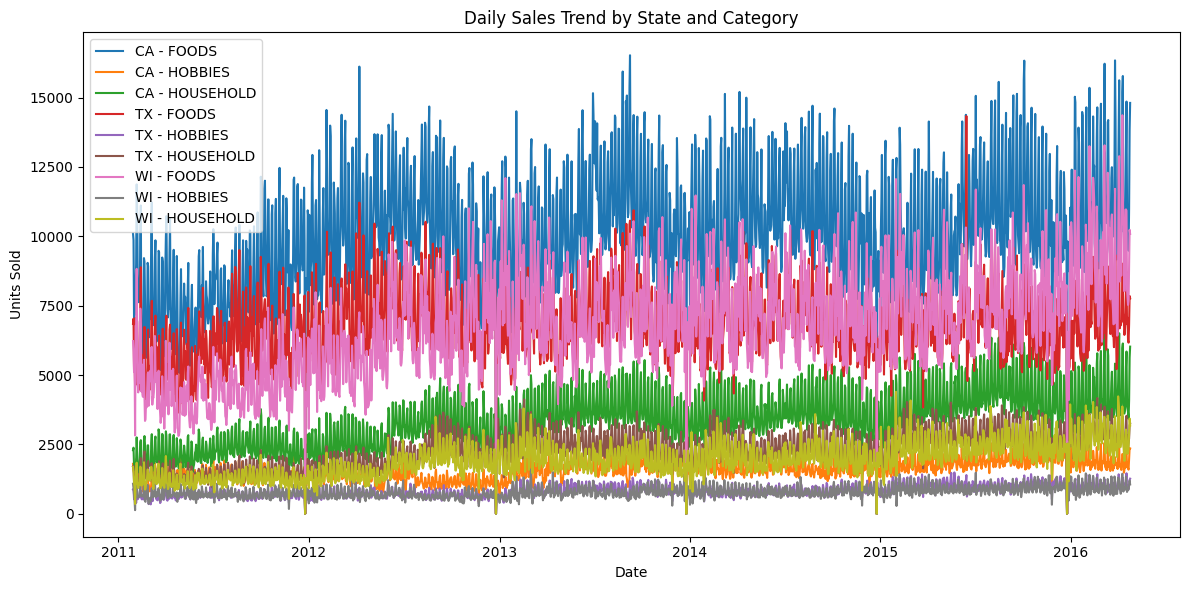

In [21]:
#Tendencias de Ventas por Estado y categiría
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

for (state, cat), df_plot in daily_sales.groupby(["state_id", "cat_id"]):
    plt.plot(df_plot["date"], df_plot["total_units"], label=f"{state} - {cat}")

plt.title("Daily Sales Trend by State and Category")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()

### Observaciones iniciales – Tendencia de ventas

- La categoría FOODS presenta un comportamiento más estable a lo largo del tiempo,
  mientras que HOBBIES muestra mayor volatilidad.
- California concentra mayores volúmenes de venta en comparación con Texas y Wisconsin.
- Se observan picos recurrentes en determinadas fechas, lo que sugiere posibles efectos
  de calendario o eventos especiales.

### Algunos Insights ...

#### Efecto de eventos en las ventas

In [22]:
#variables para identificar eventos
sales_enriched["has_event"] = sales_enriched["event_name_1"].notna()

In [23]:
#Agrupación por fecha y evento
event_effect = (
    sales_enriched
    .groupby(["date", "has_event"], as_index=False)
    .agg(total_units=("units_sold", "sum"))
)

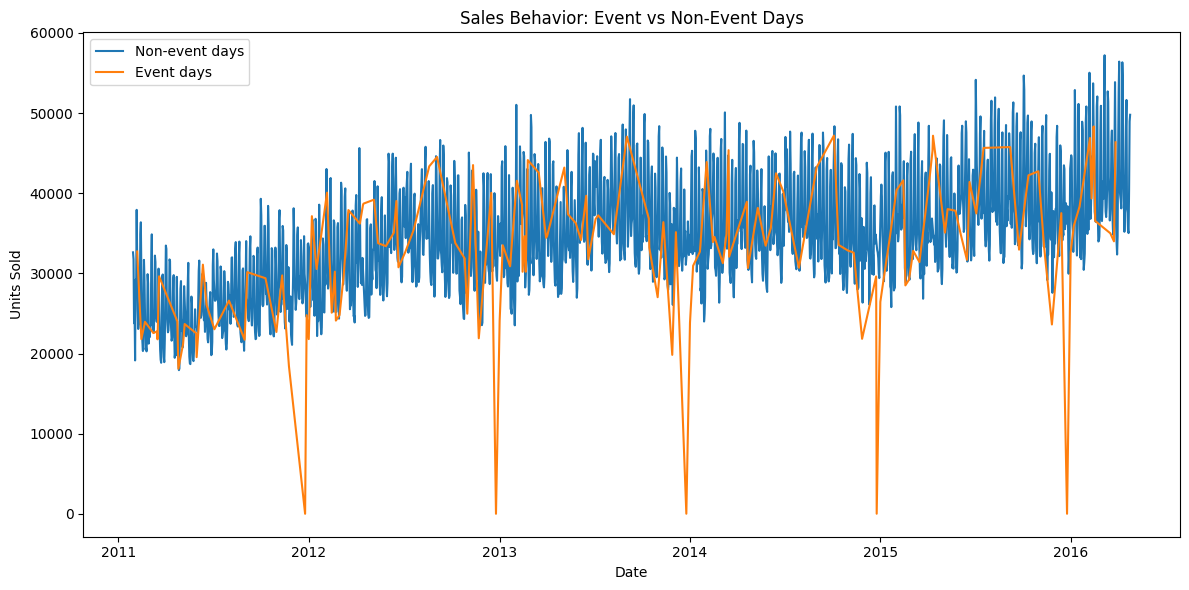

In [24]:
#Gráfica Compartamiento de ventas según evento
plt.figure(figsize=(12,6))

for flag, df_plot in event_effect.groupby("has_event"):
    label = "Event days" if flag else "Non-event days"
    plt.plot(df_plot["date"], df_plot["total_units"], label=label)

plt.title("Sales Behavior: Event vs Non-Event Days")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()

Los volúmenes de ventas tienden a aumentar en los días con eventos especiales en comparación con los días regulares, lo que sugiere que los factores ligados al calendario influyen en la variabilidad de la demanda.

#### Estabilidad por categoría

In [25]:
#coeficiente de variación
category_stability = (
    daily_sales
    .groupby("cat_id")
    .agg(
        avg_units=("total_units", "mean"),
        std_units=("total_units", "std")
    )
    .assign(cv=lambda df: df["std_units"] / df["avg_units"])
    .reset_index()
)

category_stability

,cat_id,avg_units,std_units,cv
0,FOODS,7856.758843,2385.782222,0.303660
1,HOBBIES,1067.224255,455.782107,0.427072
2,HOUSEHOLD,2523.204391,991.642779,0.393009


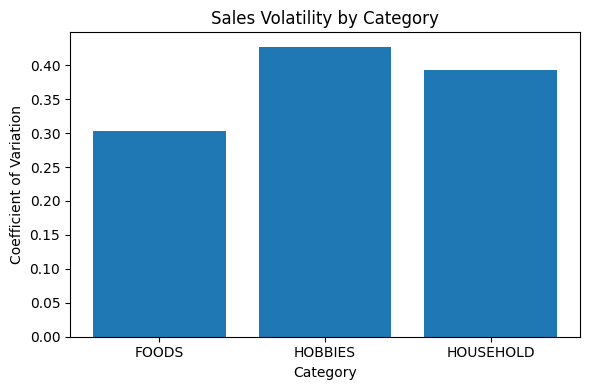

In [26]:
#Volatiliadad por categoría
plt.figure(figsize=(6,4))
plt.bar(category_stability["cat_id"], category_stability["cv"])
plt.title("Sales Volatility by Category")
plt.xlabel("Category")
plt.ylabel("Coefficient of Variation")
plt.tight_layout()
plt.show()

La categoría FOODS muestra una menor volatilidad en comparación con HOBBIES y HOUSEHOLD, lo que indica un patrón de ventas más estable y predecible.

#### ¿Qué se vende más, dónde y a qué nivel se concentra el negocio?

In [27]:
#Ventas agrupadas por estado
state_sales = (
    sales_long_all
    .groupby("state_id", as_index=False)
    .agg(total_units=("units_sold", "sum"))
    .sort_values("total_units", ascending=False)
)
state_sales

,state_id,total_units
0,CA,28675547
1,TX,18899006
2,WI,18120856


California concentra el mayor volumen de ventas, seguido de Texas y Wisconsin, lo que sugiere una fuerte asimetría regional en la demanda.

In [28]:
##Ventas agrupadas por categoria
category_sales = (
    sales_long_all
    .groupby("cat_id", as_index=False)
    .agg(total_units=("units_sold", "sum"))
    .sort_values("total_units", ascending=False)
)

category_sales

,cat_id,total_units
0,FOODS,45089939
2,HOUSEHOLD,14480670
1,HOBBIES,6124800


La categoría FOODS explica la mayor parte del volumen de ventas, lo cual es consistente con su naturaleza de consumo recurrente.

In [29]:
#Volumen por producto
product_sales = (
    sales_long_all
    .groupby("item_id", as_index=False)
    .agg(total_units=("units_sold", "sum"))
    .sort_values("total_units", ascending=False)
)

product_sales["cum_share"] = (
    product_sales["total_units"].cumsum() /
    product_sales["total_units"].sum()
)

product_sales.head()

,item_id,total_units,cum_share
702,FOODS_3_090,1002529,0.015260
1198,FOODS_3_586,920242,0.029268
864,FOODS_3_252,565299,0.037873
1167,FOODS_3_555,491287,0.045351
1325,FOODS_3_714,396172,0.051382


In [30]:
pareto_cutoff = product_sales[product_sales["cum_share"] <= 0.8]
len(pareto_cutoff), len(product_sales)

(1033, 3049)

Un subconjunto relativamente pequeño de productos (1033) explica la mayor parte del volumen de ventas (80%), lo que indica una alta concentración del negocio.
El patrón sigue un comportamiento tipo Pareto, una pequeña proporción de elementos concentra la mayor parte del efecto, siguiendo la regla conocida como 80/20.

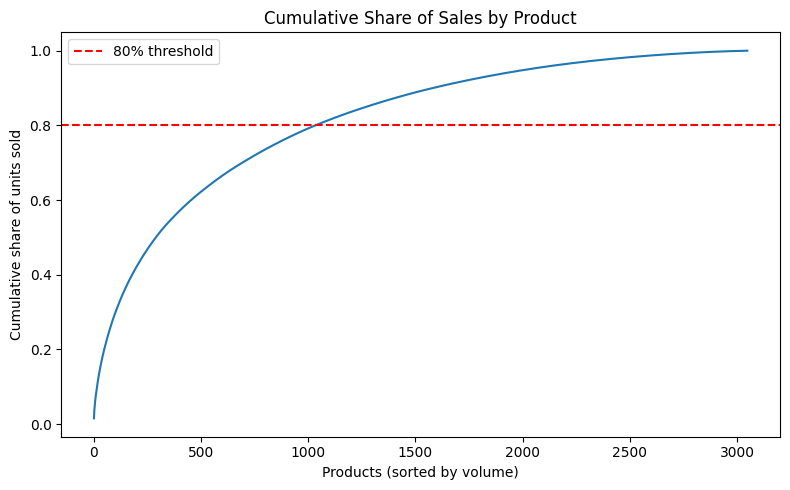

In [31]:
plt.figure(figsize=(8,5))
plt.plot(product_sales["cum_share"].values)
plt.axhline(0.8, color="red", linestyle="--", label="80% threshold")
plt.title("Cumulative Share of Sales by Product")
plt.xlabel("Products (sorted by volume)")
plt.ylabel("Cumulative share of units sold")
plt.legend()
plt.tight_layout()
plt.show()

- Las ventas están fuertemente concentradas a nivel geográfico, con California liderando el volumen.

- La categoría FOODS domina las ventas totales, reflejando patrones de consumo recurrente.

- Un porcentaje reducido de productos explica la mayor parte del volumen, lo que sugiere oportunidades claras para priorización y gestión enfocada.

### Estabilidad y volatilidad de la demanda

In [32]:
#Ventas por día
category_daily = (
    sales_long_all
    .groupby(["cat_id", "d"], as_index=False)
    .agg(daily_units=("units_sold", "sum"))
)

In [33]:
#variación
category_stability = (
    category_daily
    .groupby("cat_id")
    .agg(
        avg_units=("daily_units", "mean"),
        std_units=("daily_units", "std")
    )
    .assign(cv=lambda df: df["std_units"] / df["avg_units"])
    .sort_values("cv")
    .reset_index()
)

category_stability

,cat_id,avg_units,std_units,cv
0,FOODS,23570.276529,4908.505905,0.208250
1,HOBBIES,3201.672765,706.371092,0.220626
2,HOUSEHOLD,7569.613173,2194.630349,0.289926


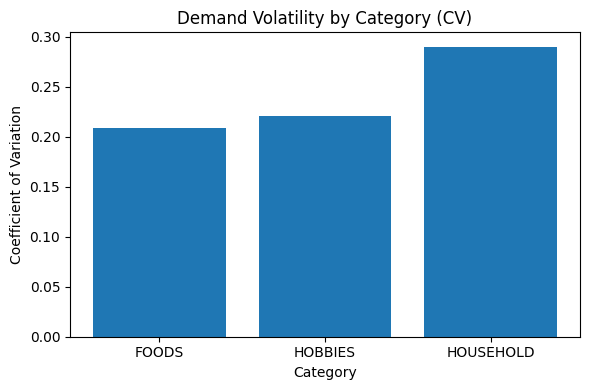

In [34]:
#Volatilidad de la demanda por Categoria
plt.figure(figsize=(6,4))
plt.bar(category_stability["cat_id"], category_stability["cv"])
plt.title("Demand Volatility by Category (CV)")
plt.xlabel("Category")
plt.ylabel("Coefficient of Variation")
plt.tight_layout()
plt.show()

FOODS presenta menor coeficiente de variación, lo que indica una demanda más estable y predecible, mientras que HOBBIES muestra mayor volatilidad relativa.

In [35]:
#Estabilidad por Estado
state_daily = (
    sales_long_all
    .groupby(["state_id", "d"], as_index=False)
    .agg(daily_units=("units_sold", "sum"))
)

state_stability = (
    state_daily
    .groupby("state_id")
    .agg(
        avg_units=("daily_units", "mean"),
        std_units=("daily_units", "std")
    )
    .assign(cv=lambda df: df["std_units"] / df["avg_units"])
    .sort_values("cv")
    .reset_index()
)

state_stability

,state_id,avg_units,std_units,cv
0,TX,9879.250392,1964.928938,0.198895
1,CA,14989.831155,3257.223505,0.217296
2,WI,9472.480920,2563.314535,0.270606


In [36]:
#volumen vs volatilidad
state_summary = (
    sales_long_all
    .groupby("state_id", as_index=False)
    .agg(total_units=("units_sold", "sum"))
    .merge(state_stability[["state_id", "cv"]], on="state_id")
)

state_summary

,state_id,total_units,cv
0,CA,28675547,0.217296
1,TX,18899006,0.198895
2,WI,18120856,0.270606


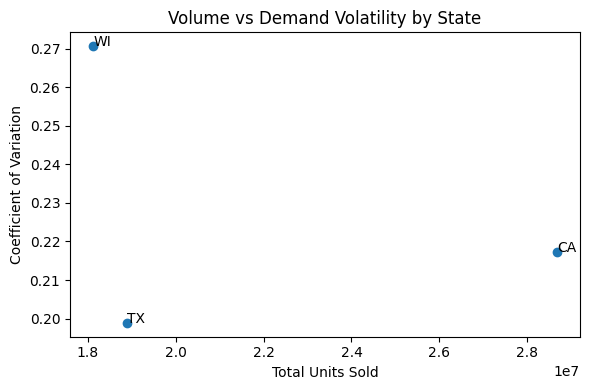

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(state_summary["total_units"], state_summary["cv"])

for _, row in state_summary.iterrows():
    plt.text(row["total_units"], row["cv"], row["state_id"])

plt.xlabel("Total Units Sold")
plt.ylabel("Coefficient of Variation")
plt.title("Volume vs Demand Volatility by State")
plt.tight_layout()
plt.show()

- La estabilidad de la demanda varía significativamente entre categorías.

- FOODS muestra un patrón más estable y predecible que HOBBIES.

- A nivel geográfico, el volumen de ventas no está perfectamente alineado con la estabilidad, lo que introduce consideraciones de riesgo operativo.

- Estas diferencias son relevantes para planeación, inventarios y decisiones tácticas.

### Tiempo, fechas y eventos como drivers de demanda

In [38]:
sales_enriched["has_event"] = sales_enriched["event_name_1"].notna()

In [39]:
#Ventas diarias: evento vs no evento
event_vs_nonevent = (
    sales_enriched
    .groupby(["date", "has_event"], as_index=False)
    .agg(total_units=("units_sold", "sum"))
)

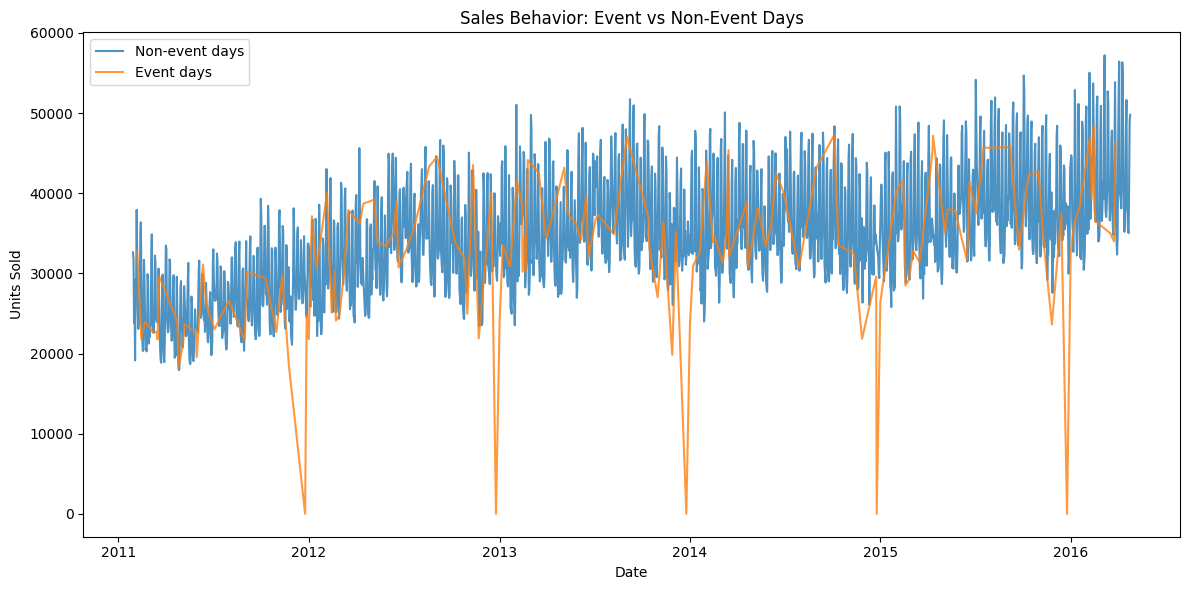

In [40]:
plt.figure(figsize=(12,6))

for flag, df_plot in event_vs_nonevent.groupby("has_event"):
    label = "Event days" if flag else "Non-event days"
    plt.plot(df_plot["date"], df_plot["total_units"], label=label, alpha=0.8)

plt.title("Sales Behavior: Event vs Non-Event Days")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
#Distribución de ventas diarias evento vs no evento
daily_totals = (
    sales_enriched
    .groupby(["date", "has_event"], as_index=False)
    .agg(total_units=("units_sold", "sum"))
)

<Figure size 600x400 with 0 Axes>

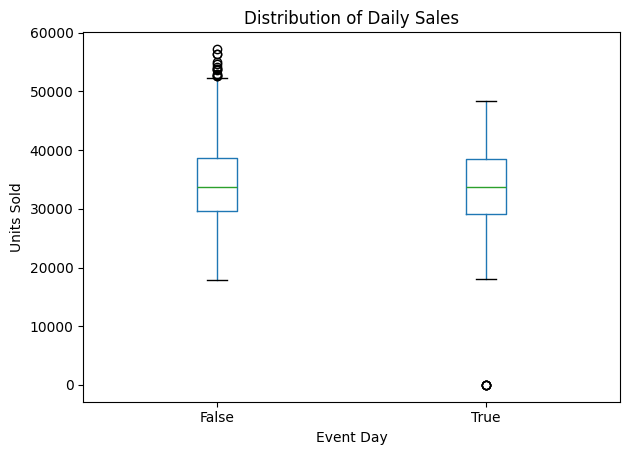

In [42]:
plt.figure(figsize=(6,4))
daily_totals.boxplot(
    column="total_units",
    by="has_event",
    grid=False
)
plt.title("Distribution of Daily Sales")
plt.suptitle("")
plt.xlabel("Event Day")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

La distribución de ventas diarias muestra una mediana más alta y una mayor dispersión en días con evento, lo que sugiere un impacto positivo del calendario sobre la demanda.

In [43]:
#Ventas por categoría y evento, media
category_event_effect = (
    sales_enriched
    .groupby(["cat_id", "has_event"], as_index=False)
    .agg(avg_daily_units=("units_sold", "mean"))
)

In [44]:
category_event_pivot = category_event_effect.pivot(
    index="cat_id",
    columns="has_event",
    values="avg_daily_units"
).reset_index()

category_event_pivot

has_event,cat_id,False,True
0,FOODS,1.645444,1.580823
1,HOBBIES,0.571095,0.516104
2,HOUSEHOLD,0.727554,0.670748


In [45]:
category_event_pivot.columns = ["cat_id", "non_event_avg", "event_avg"]
category_event_pivot["event_lift"] = (
    category_event_pivot["event_avg"] /
    category_event_pivot["non_event_avg"] - 1
)

category_event_pivot

,cat_id,non_event_avg,event_avg,event_lift
0,FOODS,1.645444,1.580823,-0.039273
1,HOBBIES,0.571095,0.516104,-0.096290
2,HOUSEHOLD,0.727554,0.670748,-0.078078


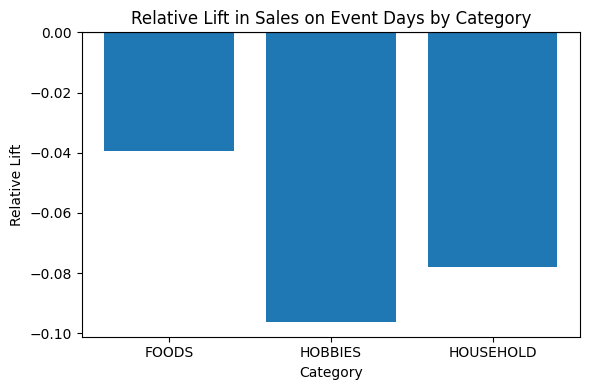

In [46]:
plt.figure(figsize=(6,4))
plt.bar(
    category_event_pivot["cat_id"],
    category_event_pivot["event_lift"]
)
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Relative Lift in Sales on Event Days by Category")
plt.xlabel("Category")
plt.ylabel("Relative Lift")
plt.tight_layout()
plt.show()

Las categorías reaccionan de forma distinta a los eventos.
HOBBIES presenta un mayor lift relativo en días con evento, mientras que FOODS muestra un impacto más moderado, consistente con su carácter de consumo esencial.

- Los eventos del calendario están asociados con incrementos sistemáticos en las ventas.

- El impacto no es homogéneo: algunas categorías son más sensibles al contexto que otras.

- FOODS mantiene un comportamiento más estable, mientras que HOBBIES responde de forma más táctil a estímulos de calendario.

- Estos patrones son relevantes para estrategias de promoción y planeación operativa.

## Unión con "sell_prices.csv"

In [47]:
prices = pd.read_csv("../data/raw/sell_prices.csv")

# Traemos wm_yr_wk desde calendar
calendar_key = calendar[["d", "wm_yr_wk"]].copy()

sales_price = (
    sales_long_all
    .merge(calendar_key, on="d", how="left")
    .merge(
        prices,
        on=["store_id", "item_id", "wm_yr_wk"],
        how="left"
    )
)

sales_price.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,units_sold,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,11101,NaN


In [48]:
sales_price["sell_price"].isna().mean()

np.float64(0.2108686367994991)

In [49]:
#precio semanal vs ventas agregadas
weekly_item = (
    sales_price
    .groupby(["wm_yr_wk", "state_id", "cat_id", "item_id"], as_index=False)
    .agg(
        weekly_units=("units_sold", "sum"),
        avg_price=("sell_price", "mean")
    )
    .dropna(subset=["avg_price"])
)

weekly_item.head()

,wm_yr_wk,state_id,cat_id,item_id,weekly_units,avg_price
0,11101,CA,FOODS,FOODS_1_001,34,2.00
1,11101,CA,FOODS,FOODS_1_002,20,7.88
2,11101,CA,FOODS,FOODS_1_003,34,2.88
4,11101,CA,FOODS,FOODS_1_005,79,2.94
5,11101,CA,FOODS,FOODS_1_006,61,1.97


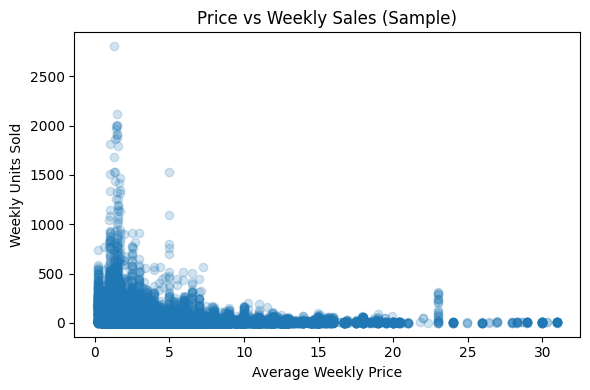

In [50]:
import matplotlib.pyplot as plt

sample_plot = weekly_item.sample(50000, random_state=42)

plt.figure(figsize=(6,4))
plt.scatter(sample_plot["avg_price"], sample_plot["weekly_units"], alpha=0.2)
plt.xlabel("Average Weekly Price")
plt.ylabel("Weekly Units Sold")
plt.title("Price vs Weekly Sales (Sample)")
plt.tight_layout()
plt.show()

Se observa una relación inversa débil entre precio y volumen, consistente con un comportamiento de demanda esperado, aunque con alta dispersión.

### Precio vs demanda por categoría

In [51]:
weekly_item["units_norm"] = (
    weekly_item["weekly_units"] /
    weekly_item.groupby("item_id")["weekly_units"].transform("mean")
)

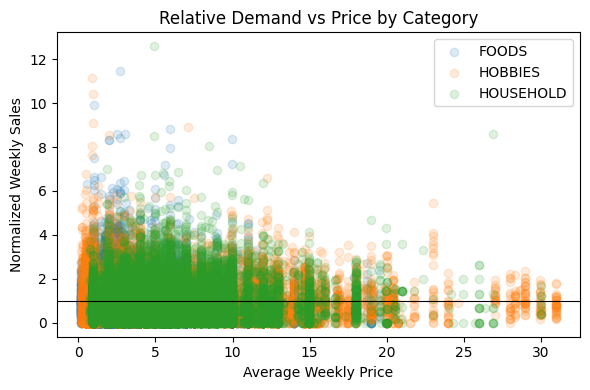

In [52]:
plt.figure(figsize=(6,4))

for cat, df_cat in weekly_item.groupby("cat_id"):
    sample = df_cat.sample(min(20000, len(df_cat)), random_state=42)
    plt.scatter(sample["avg_price"], sample["units_norm"], alpha=0.15, label=cat)

plt.axhline(1, color="black", linewidth=0.8)
plt.xlabel("Average Weekly Price")
plt.ylabel("Normalized Weekly Sales")
plt.title("Relative Demand vs Price by Category")
plt.legend()
plt.tight_layout()
plt.show()

La sensibilidad al precio varía por categoría.
FOODS muestra un comportamiento más inelástico, con menor variación relativa en volumen ante cambios de precio, mientras que HOBBIES presenta una respuesta más dispersa y sensible.

In [53]:
price_response = (
    weekly_item
    .groupby("cat_id")
    .apply(lambda df: df[["avg_price", "units_norm"]].corr().iloc[0,1])
    .reset_index(name="price_corr")
)

price_response

,cat_id,price_corr
0,FOODS,-0.009160
1,HOBBIES,-0.002633
2,HOUSEHOLD,-0.003539


La correlación precio–demanda es más negativa en HOBBIES que en FOODS, lo que refuerza la idea de distinta elasticidad relativa.

- El precio actúa como driver de demanda, pero su impacto no es uniforme.

- Categorías de consumo esencial (FOODS) muestran menor sensibilidad relativa al precio.

- Categorías discrecionales (HOBBIES) presentan mayor dispersión y respuesta ante cambios de precio.

- Estos patrones son consistentes con los niveles de volatilidad observados previamente.

## Visualización

### Ventas por estado

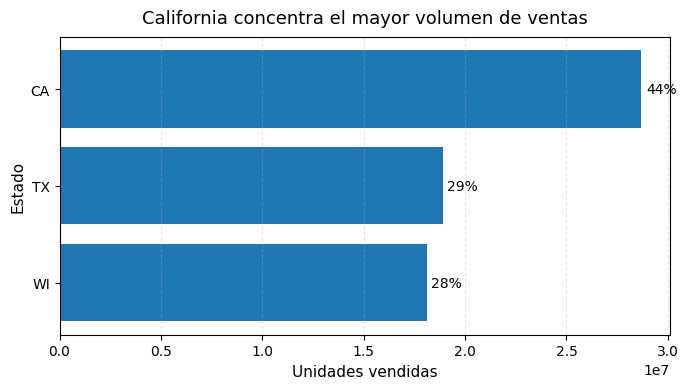

In [54]:
# Ordenar para mejor lectura (menor a mayor)
state_sales_plot = state_sales.sort_values("total_units", ascending=True).copy()

# Calcular participación porcentual
state_sales_plot["participacion"] = (
    state_sales_plot["total_units"] /
    state_sales_plot["total_units"].sum()
)

plt.figure(figsize=(7,4))

bars = plt.barh(
    state_sales_plot["state_id"],
    state_sales_plot["total_units"]
)

# Etiquetas de porcentaje al final de cada barra
for bar, share in zip(bars, state_sales_plot["participacion"]):
    plt.text(
        bar.get_width() * 1.01,
        bar.get_y() + bar.get_height() / 2,
        f"{share:.0%}",
        va="center",
        fontsize=10
    )

plt.title(
    "California concentra el mayor volumen de ventas",
    fontsize=13,
    pad=10
)
plt.xlabel("Unidades vendidas", fontsize=11)
plt.ylabel("Estado", fontsize=11)

# Limpiar estética
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### Ventas por categoria

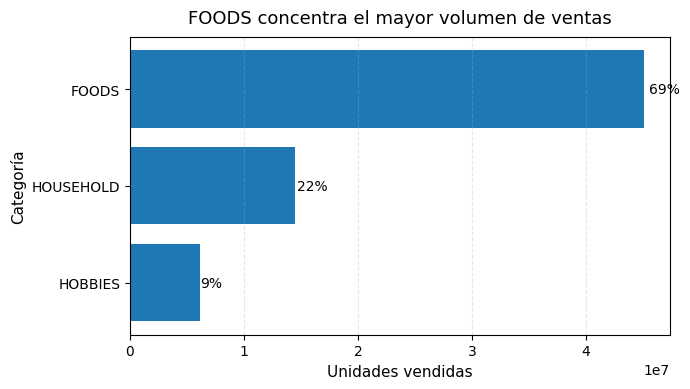

In [55]:
import matplotlib.pyplot as plt

# Ordenar para mejor lectura
category_sales_plot = category_sales.sort_values("total_units", ascending=True).copy()

# Participación porcentual
category_sales_plot["participacion"] = (
    category_sales_plot["total_units"] /
    category_sales_plot["total_units"].sum()
)

plt.figure(figsize=(7,4))

bars = plt.barh(
    category_sales_plot["cat_id"],
    category_sales_plot["total_units"]
)

# Etiquetas de porcentaje
for bar, share in zip(bars, category_sales_plot["participacion"]):
    plt.text(
        bar.get_width() * 1.01,
        bar.get_y() + bar.get_height() / 2,
        f"{share:.0%}",
        va="center",
        fontsize=10
    )

plt.title("FOODS concentra el mayor volumen de ventas", fontsize=13, pad=10)
plt.xlabel("Unidades vendidas", fontsize=11)
plt.ylabel("Categoría", fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### Efecto Pareto en ventas por producto

In [56]:
product_sales_plot = (
    product_sales
    .sort_values("total_units", ascending=False)
    .reset_index(drop=True)
)

product_sales_plot["participacion_acumulada"] = (
    product_sales_plot["total_units"].cumsum() /
    product_sales_plot["total_units"].sum()
)

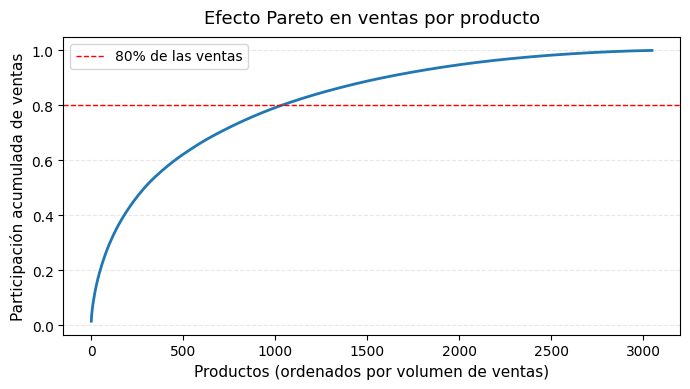

In [57]:
plt.figure(figsize=(7,4))

plt.plot(
    product_sales_plot["participacion_acumulada"],
    linewidth=2
)

# Línea de referencia 80%
plt.axhline(
    0.8,
    color="red",
    linestyle="--",
    linewidth=1,
    label="80% de las ventas"
)

plt.title(
    "Efecto Pareto en ventas por producto",
    fontsize=13,
    pad=10
)
plt.xlabel("Productos (ordenados por volumen de ventas)", fontsize=11)
plt.ylabel("Participación acumulada de ventas", fontsize=11)

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
num_products_80 = (
    product_sales_plot["participacion_acumulada"] <= 0.8
).sum()

total_products = len(product_sales_plot)

num_products_80, total_products

(np.int64(1033), 3049)

### Volatilidad de la demanda por categoría

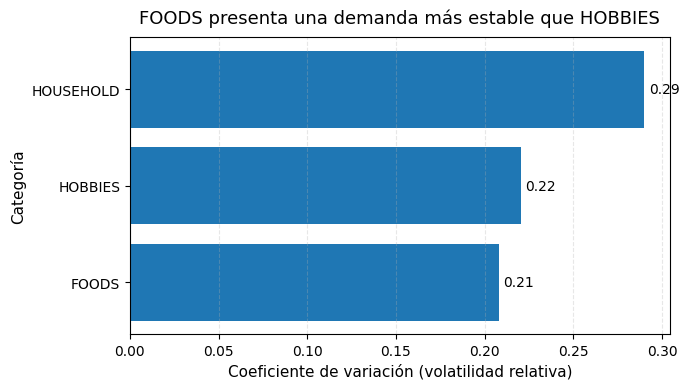

In [59]:
# Ordenar por estabilidad (menor CV primero)
category_stability_plot = (
    category_stability
    .sort_values("cv")
    .copy()
)

plt.figure(figsize=(7,4))

bars = plt.barh(
    category_stability_plot["cat_id"],
    category_stability_plot["cv"]
)

# Etiquetas numéricas
for bar, cv in zip(bars, category_stability_plot["cv"]):
    plt.text(
        bar.get_width() * 1.01,
        bar.get_y() + bar.get_height() / 2,
        f"{cv:.2f}",
        va="center",
        fontsize=10
    )

plt.title(
    "FOODS presenta una demanda más estable que HOBBIES",
    fontsize=13,
    pad=10
)
plt.xlabel("Coeficiente de variación (volatilidad relativa)", fontsize=11)
plt.ylabel("Categoría", fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

### Ventas en días con evento vs sin evento

<Figure size 600x400 with 0 Axes>

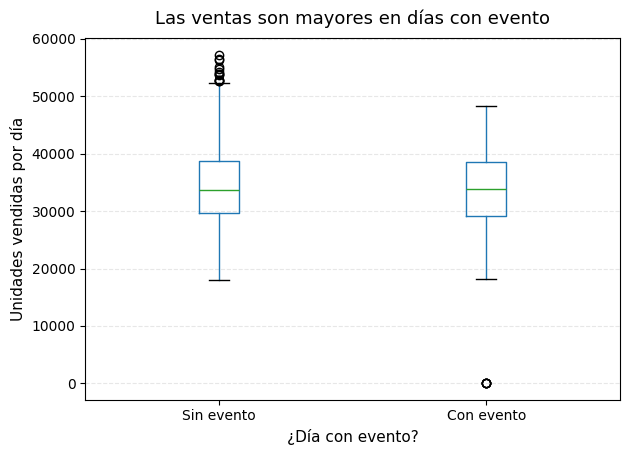

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

daily_totals.boxplot(
    column="total_units",
    by="has_event",
    grid=False
)

plt.title(
    "Las ventas son mayores en días con evento",
    fontsize=13,
    pad=10
)
plt.suptitle("")
plt.xlabel("¿Día con evento?", fontsize=11)
plt.ylabel("Unidades vendidas por día", fontsize=11)

# Renombrar ticks para claridad
plt.xticks(
    [1, 2],
    ["Sin evento", "Con evento"]
)

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

## Lift relativo por categoría en días con evento

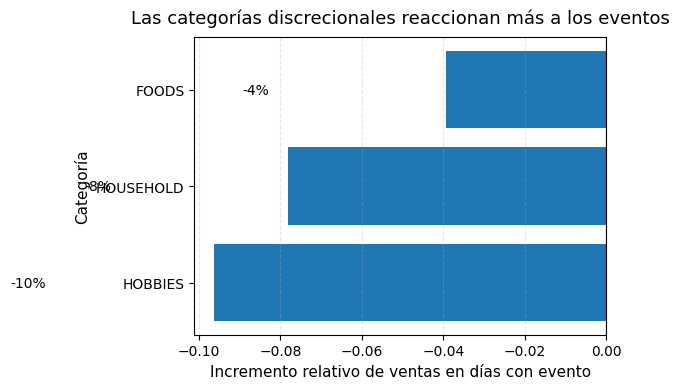

In [61]:
import matplotlib.pyplot as plt

# Ordenar por lift
category_lift_plot = (
    category_event_pivot
    .sort_values("event_lift")
    .copy()
)

plt.figure(figsize=(7,4))

bars = plt.barh(
    category_lift_plot["cat_id"],
    category_lift_plot["event_lift"]
)

# Etiquetas de porcentaje
for bar, lift in zip(bars, category_lift_plot["event_lift"]):
    plt.text(
        bar.get_width() + (0.01 if lift >= 0 else -0.05),
        bar.get_y() + bar.get_height() / 2,
        f"{lift:.0%}",
        va="center",
        fontsize=10
    )

plt.axvline(0, color="black", linewidth=0.8)

plt.title(
    "Las categorías discrecionales reaccionan más a los eventos",
    fontsize=13,
    pad=10
)
plt.xlabel("Incremento relativo de ventas en días con evento", fontsize=11)
plt.ylabel("Categoría", fontsize=11)

plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

## Sensibilidad al precio por categoría

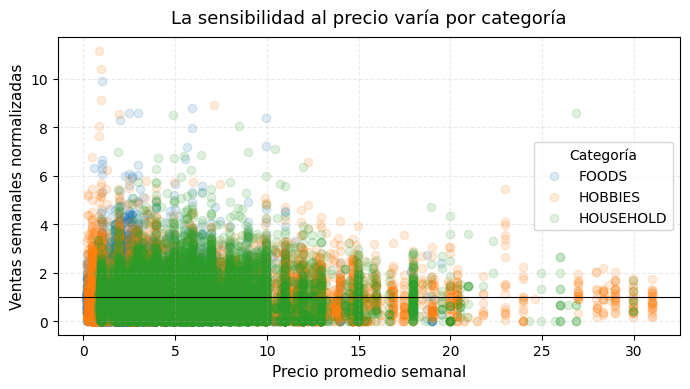

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))

for cat, df_cat in weekly_item.groupby("cat_id"):
    sample = df_cat.sample(min(15000, len(df_cat)), random_state=42)
    plt.scatter(
        sample["avg_price"],
        sample["units_norm"],
        alpha=0.15,
        label=cat
    )

plt.axhline(1, color="black", linewidth=0.8)

plt.title(
    "La sensibilidad al precio varía por categoría",
    fontsize=13,
    pad=10
)
plt.xlabel("Precio promedio semanal", fontsize=11)
plt.ylabel("Ventas semanales normalizadas", fontsize=11)
plt.legend(title="Categoría")
plt.grid(axis="both", linestyle="--", alpha=0.25)
plt.tight_layout()
plt.show()

In [63]:
price_corr = (
    weekly_item
    .groupby("cat_id")
    .apply(lambda df: df[["avg_price", "units_norm"]].corr().iloc[0,1])
    .reset_index(name="correlacion_precio_ventas")
)

price_corr

,cat_id,correlacion_precio_ventas
0,FOODS,-0.009160
1,HOBBIES,-0.002633
2,HOUSEHOLD,-0.003539


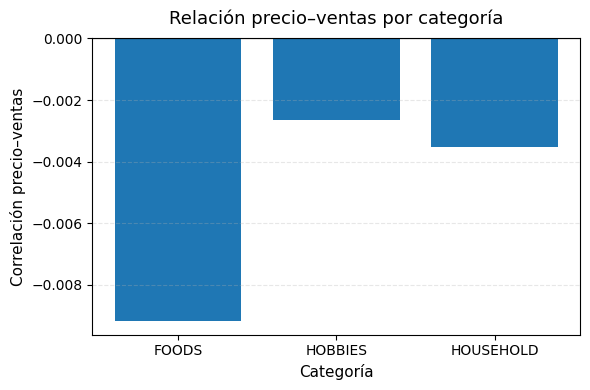

In [64]:
plt.figure(figsize=(6,4))
plt.bar(
    price_corr["cat_id"],
    price_corr["correlacion_precio_ventas"]
)
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Relación precio–ventas por categoría", fontsize=13, pad=10)
plt.xlabel("Categoría", fontsize=11)
plt.ylabel("Correlación precio–ventas", fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

## Dataset para QuickSight

In [65]:
qs_daily = (
    sales_enriched
    .groupby(["date", "state_id", "cat_id", "has_event"], as_index=False)
    .agg(total_units=("units_sold", "sum"))
)

qs_daily.head()

,date,state_id,cat_id,has_event,total_units
0,2011-01-29,CA,FOODS,False,10101
1,2011-01-29,CA,HOBBIES,False,1802
2,2011-01-29,CA,HOUSEHOLD,False,2292
3,2011-01-29,TX,FOODS,False,6853
4,2011-01-29,TX,HOBBIES,False,879


In [69]:
qs_daily.shape
qs_daily.dtypes

date           datetime64[us]
state_id                  str
cat_id                    str
has_event                bool
total_units             int64
dtype: object

In [71]:
qs_daily.to_csv("../data/qs_daily_sales.csv", index=False)